In [41]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# import pandas and numpy
import pandas as pd
import numpy as np

# read the data
plant1 = pd.read_csv("Plant_1_Generation_Data.csv")
weather1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")


import datetime as dt
# format DATE_TIME column into datetime object
plant1['DATE_TIME'] = pd.to_datetime(plant1['DATE_TIME'])
weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'])



In [42]:

plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [43]:
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [44]:
df_weather = weather1.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_plant1 = plant1.drop(['PLANT_ID'], axis=1)

In [50]:
df_plant_weather1 = df_plant1.merge(df_weather, on="DATE_TIME")
print(df_plant_weather1)

                DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0     2020-05-15 00:00:00  1BY6WEcLGh8j5v7       0.0       0.0        0.000   
1     2020-05-15 00:00:00  1IF53ai7Xc0U56Y       0.0       0.0        0.000   
2     2020-05-15 00:00:00  3PZuoBAID5Wc2HD       0.0       0.0        0.000   
3     2020-05-15 00:00:00  7JYdWkrLSPkdwr4       0.0       0.0        0.000   
4     2020-05-15 00:00:00  McdE0feGgRqW7Ca       0.0       0.0        0.000   
...                   ...              ...       ...       ...          ...   
45675 2020-06-17 23:45:00  uHbuxQJl8lW7ozc       0.0       0.0     5967.000   
45676 2020-06-17 23:45:00  wCURE6d3bPkepu2       0.0       0.0     5147.625   
45677 2020-06-17 23:45:00  z9Y9gH1T5YWrNuG       0.0       0.0     5819.000   
45678 2020-06-17 23:45:00  zBIq5rxdHJRwDNY       0.0       0.0     5817.000   
45679 2020-06-17 23:45:00  zVJPv84UY57bAof       0.0       0.0     5910.000   

       TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEM

<AxesSubplot:xlabel='DATE_TIME'>

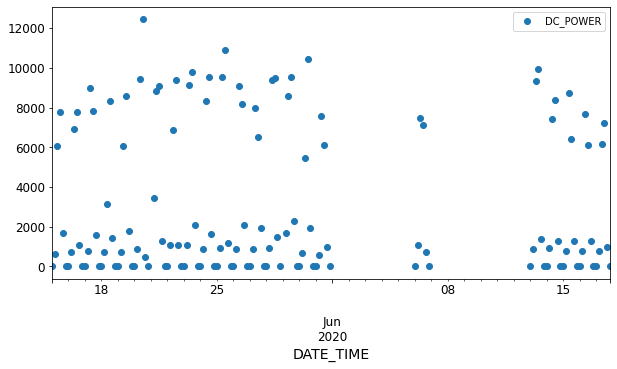

In [86]:
new = df_plant_weather1.resample('4H').mean()
new.DC_POWER.plot(style='o',legend=True,figsize=(10,5))

In [46]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets using TimeSeriesSplit, 80% training, 20% testing
n_splits = 2

X_train, X_test, y_train, y_test = train_test_split(new.index, new, test_size=0.2, random_state=42)
